## Decision Trees

Decision trees are versatile machine learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. For example, in Chapter 2 you trained a DecisionTreeRegressor model on the California housing dataset, fitting it perfectly (actually, overfitting it).

Decision trees are also the fundamental components of random forests (see Chapter 7), which are among the most powerful machine learning algorithms available today.

In this chapter we will start by discussing how to train, visualize, and make predictions with decision trees. Then we will go through the CART training algorithm used by Scikit-Learn, and we will explore how to regularize trees and use them for regression tasks. Finally, we will discuss some of the limitations of decision trees.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

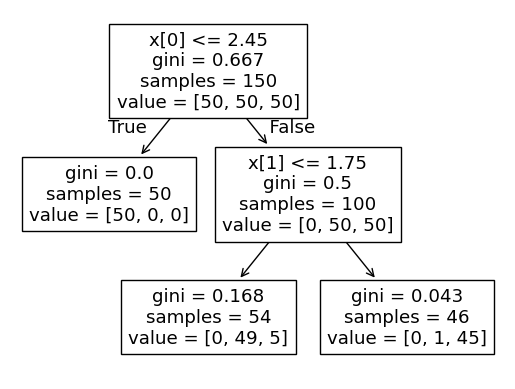

In [4]:
from sklearn.tree import plot_tree

plot_tree(tree_clf)

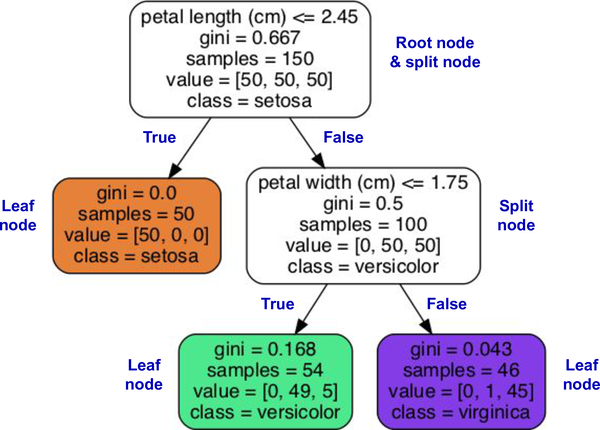

## Making Predictions

Let’s see how the tree represented in Figure 6-1 makes predictions. Suppose you find an iris flower and you want to classify it based on its petals. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the decision tree predicts that your flower is an Iris setosa (class=setosa).

Now suppose you find another flower, and this time the petal length is greater than 2.45 cm. You again start at the root but now move down to its right child node (depth 1, right). This is not a leaf node, it’s a split node, so it asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). It’s really that simple

Note
One of the many qualities of decision trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

A node’s samples attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left). A node’s value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica. Finally, a node’s gini attribute measures its Gini impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its Gini impurity is 0. Equation 6-1 shows how the training algorithm computes the Gini impurity Gi of the ith node. The depth-2 left node has a Gini impurity equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168.

Equation 6-1. Gini impurity

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <msub>
      <mi>G</mi>
      <mi>i</mi>
    </msub>
    <mo>=</mo>
    <mn>1</mn>
    <mo>-</mo>
    <munderover>
      <mo>&#x2211;</mo>
      <mrow>
        <mi>k</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mi>n</mi>
    </munderover>
    <msup>
      <mrow>
        <msub>
          <mi>p</mi>
          <mrow>
            <mi>i</mi>
            <mo>,</mo>
            <mi>k</mi>
          </mrow>
        </msub>
      </mrow>
      <mn>2</mn>
    </msup>
  </mrow>
</math>

In this equation:

Gi is the Gini impurity of the ith node.

pi,k is the ratio of class k instances among the training instances in the ith node.

Note
Scikit-Learn uses the CART algorithm, which produces only binary trees, meaning trees where split nodes always have exactly two children (i.e., questions only have yes/no answers). However, other algorithms, such as ID3, can produce decision trees with nodes that have more than two children.

Figure 6-2 shows this decision tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the two vertical dotted lines).

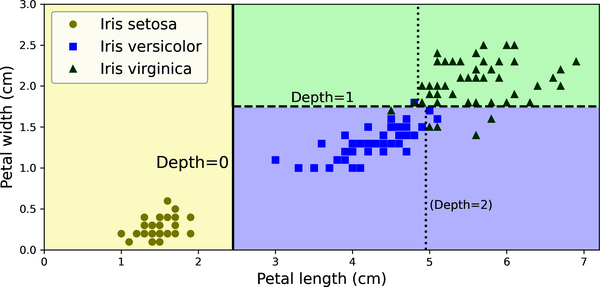

***you can find more info in tree_clf.tree_ Attribute***

### Model Interpretation: White Box Versus Black Box

Decision trees are intuitive, and their decisions are easy to interpret. Such models are often called white box models. In contrast, as you will see, random forests and neural networks are generally considered black box models. They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. For example, if a neural network says that a particular person appears in a picture, it is hard to know what contributed to this prediction: Did the model recognize that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they were sitting on? Conversely, decision trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification). The field of interpretable ML aims at creating ML systems that can explain their decisions in a way humans can understand. This is important in many domains—for example, to ensure the system does not make unfair decisions.

### Estimating Class Probabilities
A decision tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the decision tree outputs the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it outputs Iris versicolor (class 1) because it has the highest probability. Let’s check this:


In [5]:
tree_clf.predict_proba([[5, 1.5]]) # 0/54, 49/54, 5/54

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]]) # 1 (versicolor)

array([1])


Summary of the CART Algorithm for Decision Tree Training

The CART (Classification and Regression Tree) algorithm is used by Scikit-Learn to
train decision trees.

Core Concepts:

1.  Splitting:
    -   The algorithm recursively splits the training data into subsets using a
        single feature (k) and a threshold (tk).
    -   Example: "petal length <= 2.45 cm"
2.  Feature and Threshold Selection:
    -   CART aims to find the (k, tk) pair that produces the "purest" subsets.
    -   Purity is measured by the impurity of the resulting subsets.
    -   The subsets are weighted based on their size.

Cost Function (Equation 6-2) - For Classification:

    J(k, tk) = (m_left / m) * G_left + (m_right / m) * G_right

    where:
      - J(k, tk): the cost of splitting based on feature k and threshold tk.
      - m: total number of instances in the current node.
      - m_left: Number of instances in the left subset.
      - m_right: Number of instances in the right subset.
      - G_left: Impurity of the left subset (e.g., Gini impurity).
      - G_right: Impurity of the right subset (e.g., Gini impurity).

    - CART tries to *minimize* this cost function at each split.

Recursive Splitting:

    -   After an initial split, the algorithm applies the same splitting logic to
        the resulting subsets.
    -   This process repeats recursively for sub-subsets and so on.
    -   Recursion stops when:
        - Maximum depth (controlled by `max_depth` hyperparameter) is reached.
        - No split can reduce impurity.
        - Other stopping conditions based on hyperparameters like:
            - `min_samples_split`
            - `min_samples_leaf`
            - `min_weight_fraction_leaf`
            - `max_leaf_nodes`

Computational Complexity:

  1. Prediction:
     -   Time complexity of predicting using a Decision Tree is approximately
        O(log2(m)), where m is the number of training instances. This is because
         the tree is approximately balanced, and only a path from the root to a
         leaf needs to be traversed.
     -   Prediction is fast since only one feature needs to be checked at each node.

  2. Training:
     -   Time complexity of training using the CART algorithm is roughly
        O(n * m * log2(m)), where:
           - n =  number of features
           - m = number of training instances
      -The training algorithm considers all features or a subset if max_features is set,
        on all the samples for each node when determining the best split.

In Summary:
    -   CART is a greedy algorithm that seeks to minimize impurity at each split.
    -   Training a decision tree can be computationally expensive.
    -   Prediction is very fast due to its tree structure.


"""
Gini Impurity vs. Entropy in Decision Trees

The `DecisionTreeClassifier` in Scikit-Learn uses Gini impurity by default for
measuring node impurity during tree training, but you can choose entropy
instead.

Key Concepts:

1. Gini Impurity (Default):
   - Measures how mixed classes are in a node/subset.
   - A lower Gini score indicates greater purity.
   - Computationally faster.

2. Entropy (Alternative):
   - Originates in thermodynamics and information theory, indicating disorder or information content.
   - Entropy is zero when a set contains instances of only one class.
   - Calculated as follows:

       H_i = - Σ (p_{i,k} * log2(p_{i,k}))

       where:
           - H_i is the entropy of node i.
           - p_{i,k} is the proportion of instances of class k in node i.
           - The summation is over all classes where p_{i,k} != 0.

When to Use Gini vs. Entropy:

   1.  Similarity in Results:
       -   In most cases, Gini impurity and entropy lead to very similar decision
            trees.
   2. Computational Speed:
       -  Gini impurity is slightly faster to compute, hence it's a good default.
   3.  Tree Structure:
       -  When differences occur,
           - Gini impurity tends to isolate the most frequent class in its own branch.
           - Entropy tends to produce slightly more balanced trees.

Example of Entropy Calculation (depth-2 left node, with 49/54 class 1 and 5/54 class 0):

  H = -(49/54) * log2(49/54) - (5/54) * log2(5/54) ≈ 0.445

Summary:

 -  Both Gini and Entropy are used to measure impurity of nodes in decision trees.
 -  Gini impurity is faster and hence the default choice.
 -  Entropy tends to create more balanced trees.
"""

"""
Regularization Hyperparameters and Pruning in Decision Trees

Decision trees are powerful but can easily overfit the training data if
unconstrained. To control overfitting, we use regularization. Unlike
parametric models (like linear models), decision trees are non-parametric,
meaning the structure and complexity are not pre-defined.

Regularization Hyperparameters:

  - These parameters restrict the tree's freedom during training.
  - Increasing 'min_' parameters or reducing 'max_' parameters will regularize
    the model, which helps avoid overfitting.

Key Hyperparameters in Scikit-Learn's `DecisionTreeClassifier`:

  1.  `max_depth`:
      -   Maximum depth of the tree.
      -   Default is `None` (unlimited).
      -   Reducing `max_depth` limits the complexity of the tree and reduces
          overfitting.

  2.  `max_features`:
      - Maximum number of features that are evaluated for splitting at each node.
      - Limiting `max_features` helps with generalization.

  3.  `max_leaf_nodes`:
      -   Maximum number of leaf nodes allowed in the tree.
      -   Limiting `max_leaf_nodes` simplifies the tree structure and prevents overfitting.

  4.  `min_samples_split`:
      -   Minimum number of samples a node must have before it can be split.
      -  Increasing this will make splitting more difficult, preventing overfitting.

  5.  `min_samples_leaf`:
      -   Minimum number of samples a leaf node must have to be created.
      -   Increasing this forces nodes to have at least certain numbers of training samples, avoiding overfitting.

  6.  `min_weight_fraction_leaf`:
      -   Same as `min_samples_leaf`, but expressed as a fraction of the total
          number of weighted instances.

Pruning:

  -  An alternative method to regularization.
  -  Some algorithms first grow the tree with no restrictions.
  -  Pruning then removes unnecessary nodes.
  - A node is considered unnecessary if its children are all leaf nodes and:
       -  The purity improvement it provides isn't statistically significant.

  How Pruning Works:

    1. Statistical Tests:
      -   Standard statistical tests (e.g., chi-squared test - χ²) are used to
          assess the statistical significance of impurity reduction.
    2.  Null Hypothesis:
      -   A "null hypothesis" that the improvement is due to chance is tested.
    3.  P-value:
        - The p-value is calculated, which represents the probability that the
          improvement is due to chance.
    4. Pruning Threshold:
      -   If the p-value is greater than a certain threshold (typically 5%,
          controlled by a hyperparameter), it's very likely the improvement was by chance.
      - The node is considered unnecessary and removed along with its children.
    5. Iteration:
      -   Pruning continues until all unnecessary nodes have been pruned.

Summary:

  - Regularization hyperparameters and pruning are techniques to avoid
    overfitting when training decision trees.
  - Regularization constrains the tree during training using parameters
    like `max_depth`, `max_features`, `max_leaf_nodes`, `min_samples_split`,
    `min_samples_leaf` or `min_weight_fraction_leaf`.
  - Pruning removes less useful or redundant parts of the tree after training
    based on statistical tests.
"""

## Regression

Decision trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:

DecisionTreeRegressor(max_depth=2, random_state=42)

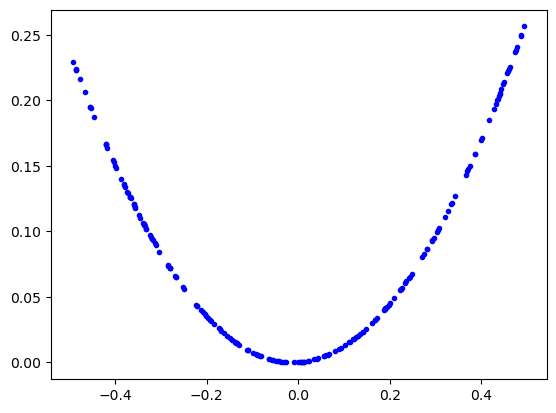

In [11]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X_q = np.random.rand(200, 1) - 0.5
y_q = X_q ** 2 + 0.025 * X_q


plt.plot(X_q, y_q, "b.")

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg.fit(X_q, y_q)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.355\nsquared_error = 0.006\nsamples = 200\nvalue = 0.085'),
 Text(0.25, 0.5, 'x[0] <= -0.308\nsquared_error = 0.004\nsamples = 171\nvalue = 0.065'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.002\nsamples = 48\nvalue = 0.141'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 123\nvalue = 0.035'),
 Text(0.75, 0.5, 'x[0] <= 0.423\nsquared_error = 0.001\nsamples = 29\nvalue = 0.201'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 9\nvalue = 0.159'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 20\nvalue = 0.22')]

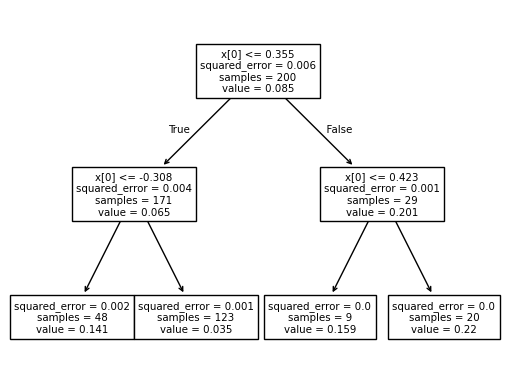

In [12]:
plot_tree(tree_reg)

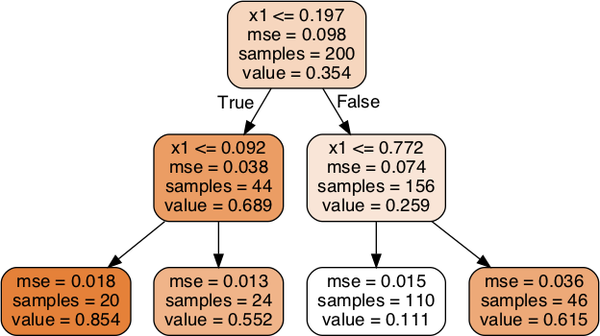

This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. For example, suppose you want to make a prediction for a new instance with x1 = 0.2. The root node asks whether x1 ≤ 0.197. Since it is not, the algorithm goes to the right child node, which asks whether x1 ≤ 0.772. Since it is, the algorithm goes to the left child node. This is a leaf node, and it predicts value=0.111. This prediction is the average target value of the 110 training instances associated with this leaf node, and it results in a mean squared error equal to 0.015 over these 110 instances.

This model’s predictions are represented on the left in Figure 6-5. If you set max_depth=3, you get the predictions represented on the right. Notice how the predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value

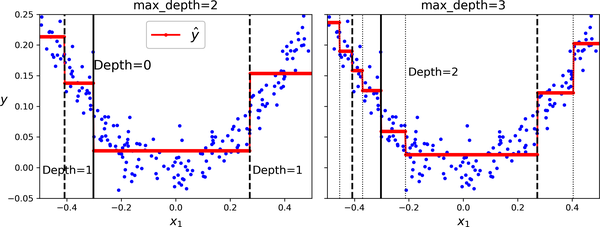

The CART algorithm works as described earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE. Equation 6-4 shows the cost function that the algorithm tries to minimize.

Equation 6-4. CART cost function for regression

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mrow>
    <mo>(</mo>
    <mi>k</mi>
    <mo>,</mo>
    <msub>
      <mi>t</mi>
      <mi>k</mi>
    </msub>
    <mo>)</mo>
  </mrow>
  <mo>=</mo>
  <mfrac>
    <msub>
      <mi>m</mi>
      <mtext>left</mtext>
    </msub>
    <mi>m</mi>
  </mfrac>
  <msub>
    <mtext>MSE</mtext>
    <mtext>left</mtext>
  </msub>
  <mo>+</mo>
  <mfrac>
    <msub>
      <mi>m</mi>
      <mtext>right</mtext>
    </msub>
    <mi>m</mi>
  </mfrac>
  <msub>
    <mtext>MSE</mtext>
    <mtext>right</mtext>
  </msub>
  <mspace width="1.em"></mspace>
  <mtext>where</mtext>
  <mspace width="4.pt"></mspace>
  <mfenced open="" close="" separators="">
    <mtable>
      <mtr>
        <mtd>
          <msub>
            <mtext>MSE</mtext>
            <mtext>node</mtext>
          </msub>
          <mo>=</mo>
          <mfrac>
            <mrow>
              <munder>
                <mo>&#x2211;</mo>
                <mrow>
                  <mi>i</mi>
                  <mo>&#x2208;</mo>
                  <mtext>node</mtext>
                </mrow>
              </munder>
              <msup>
                <mrow>
                  <mo>(</mo>
                  <msub>
                    <mover>
                      <mi>y</mi>
                      <mo>^</mo>
                    </mover>
                    <mtext>node</mtext>
                  </msub>
                  <mo>-</mo>
                  <msup>
                    <mi>y</mi>
                    <mrow>
                      <mo>(</mo>
                      <mi>i</mi>
                      <mo>)</mo>
                    </mrow>
                  </msup>
                  <mo>)</mo>
                </mrow>
                <mn>2</mn>
              </msup>
            </mrow>
            <msub>
              <mi>m</mi>
              <mi>node</mi>
            </msub>
          </mfrac>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <msub>
            <mover>
              <mi>y</mi>
              <mo>^</mo>
            </mover>
            <mtext>node</mtext>
          </msub>
          <mo>=</mo>
          <mfrac>
            <mrow>
              <munder>
                <mo>&#x2211;</mo>
                <mrow>
                  <mi>i</mi>
                  <mo>&#x2208;</mo>
                  <mtext>node</mtext>
                </mrow>
              </munder>
              <msup>
                <mi>y</mi>
                <mrow>
                  <mo>(</mo>
                  <mi>i</mi>
                  <mo>)</mo>
                </mrow>
              </msup>
            </mrow>
            <msub>
              <mi>m</mi>
              <mi>node</mi>
            </msub>
          </mfrac>
        </mtd>
      </mtr>
    </mtable>
  </mfenced>
</math>

Just like for classification tasks, decision trees are prone to overfitting when dealing with regression tasks. Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left in Figure 6-6. These predictions are obviously overfitting the training set very badly. Just setting min_samples_leaf=10 results in a much more reasonable model, represented on the right in Figure 6-6.

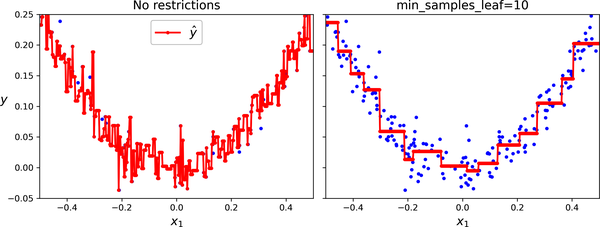

## Sensitivity to Axis Orientation

Hopefully by now you are convinced that decision trees have a lot going for them: they are relatively easy to understand and interpret, simple to use, versatile, and powerful. However, they do have a few limitations. First, as you may have noticed, decision trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to the data’s orientation. For example, Figure 6-7 shows a simple linearly separable dataset: on the left, a decision tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both decision trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

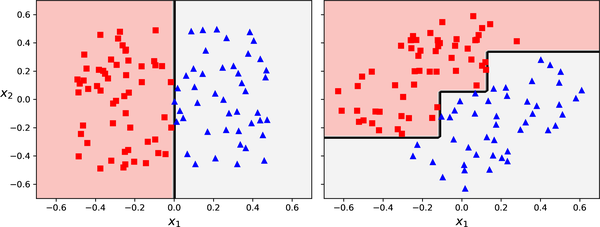

One way to limit this problem is to scale the data, then apply a principal component analysis transformation. We will look at PCA in detail in Chapter 8, but for now you only need to know that it rotates the data in a way that reduces the correlation between the features, which often (not always) makes things easier for trees.

Let’s create a small pipeline that scales the data and rotates it using PCA, then train a DecisionTreeClassifier on that data. Figure 6-8 shows the decision boundaries of that tree: as you can see, the rotation makes it possible to fit the dataset pretty well using only one feature, z1, which is a linear function of the original petal length and width. Here’s the code:

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

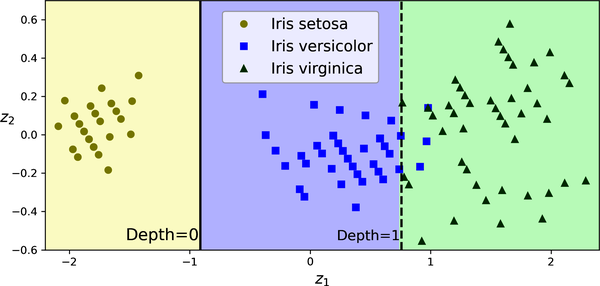

Figure 6-8. A tree’s decision boundaries on the scaled and PCA-rotated iris dataset


## Decision Trees Have a High Variance

More generally, the main issue with decision trees is that they have quite a high variance: small changes to the hyperparameters or to the data may produce very different models. In fact, since the training algorithm used by Scikit-Learn is stochastic—it randomly selects the set of features to evaluate at each node—even retraining the same decision tree on the exact same data may produce a very different model, such as the one represented in Figure 6-9 (unless you set the random_state hyperparameter). As you can see, it looks very different from the previous decision tree (Figure 6-2).

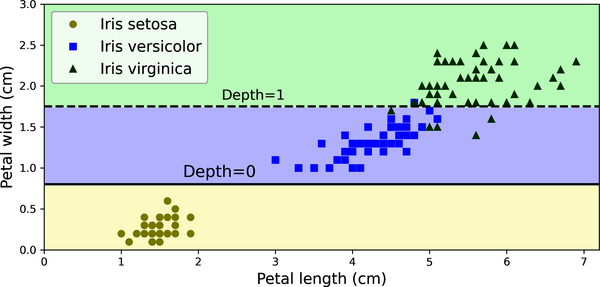
Figure 6-9. Retraining the same model on the same data may produce a very different model

Luckily, by averaging predictions over many trees, it’s possible to reduce variance significantly. Such an ensemble of trees is called a random forest, and it’s one of the most powerful types of models available today, as you will see in the next chapter.

## Excersices

1. What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

- A decision tree trained without restrictions will, by default, grow until it can no longer improve its ability to classify the training data using further splits or it reaches a point where it can no longer perform splits. There is no explicit maximum depth. The actual depth depends on the training data complexity, and unrestricted growth risks overfitting, requiring constraints like max_depth in practice.

2. Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?

- A node's Gini impurity is not always lower than its parent's. However, the split chosen for that node is always one that attempts to minimize the weighted average Gini impurity of the child nodes, resulting in child nodes that generally have a lower impurity than that of their parent. While it's possible for one or more child nodes to have a higher impurity than the parent, the overall objective of minimizing the cost function usually ensures that the average impurity is lower.

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

- Yes, decreasing max_depth is a good idea if a decision tree is overfitting because it reduces the tree's complexity, prevents memorization of training data, and promotes better generalization to new data. max_depth is a key hyperparameter for regularization

4. If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

- No, scaling input features won't help with underfitting in decision trees. Decision trees are scale-invariant; underfitting is typically caused by excessive regularization, the model being too simple, or too low of a learning rate and requires adjusting model complexity through other means

5. If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity.

The CART algorithm has a time complexity of approximately O(n log(n)), where 'n' is the number of training instances. This means the training time increases more than linearly but not as fast as O(n^2).

Therefore:

*   If training on 1 million instances takes 1 hour, it won't take exactly 10 hours to train on 10 million instances due to the log factor.
*   A rough estimate is approximately 11.66 hours, which is derived from the following:
    * T2 ≈ T1 * (n2 * log(n2)) / (n1 * log(n1))
    * T2 ≈ 1 * (10000000 * log(10000000)) / (1000000 * log(1000000))
    * T2 ≈ 1 * (10000000 * 7) / (1000000 * 6)
    * T2 ≈ 1 * 70000000 / 6000000
    * T2 ≈  11.66

*   This approximation is based on the algorithm's theoretical complexity and might vary based on implementation, hardware, and data characteristics.

**Key takeaway:** Training time scales *more than linearly* with the number of instances but not as quickly as if it was a quadratic expression.

6. If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

With no hyperparameters, and when keeping the number of instances the same, doubling the number of features will cause the tree to double the number of evaluations it needs to perform and will approximately double the training time. However, this is not a guarantee as tree depth may also change, and the optimal combination of new and old features could lead to more or less complex trees

7. Train and fine-tune a decision tree for the moons dataset by following these steps:

Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

Use train_test_split() to split the dataset into a training set and a test set.

Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [20]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(n_samples=1000, noise=0.4, random_state=42)

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

tree_clf_moons = DecisionTreeClassifier(random_state=42)

tree_clf_moons.fit(X_moons_train, y_moons_train)

DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV

tree_gcv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={"max_leaf_nodes": list(range(2, 100))}, cv=5)

In [23]:
tree_gcv.fit(X_moons_train, y_moons_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [25]:
tree_gcv.best_params_

{'max_leaf_nodes': 6}

In [26]:
tree_gcv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

In [35]:
tree_gcv.cv_results_['mean_test_score'].argmax()

4

In [24]:
tree_gcv.best_score_

0.85

In [21]:
tree_clf_moons.score(X_moons_test, y_moons_test)

0.78

8. Grow a forest by following these steps:

Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.

Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

In [54]:
from sklearn.model_selection import ShuffleSplit

shuffel_split = ShuffleSplit(n_splits=1000, test_size=len(X_moons_test), random_state=42)
model_scores = np.zeros(1000)
for i, (train, test) in enumerate(shuffel_split.split(X_moons)):
    tree_gcv.best_estimator_.fit(X_moons[train], y_moons[train])
    model_scores[i] = (tree_clf_moons.score(X_moons[test], y_moons[test]))

In [58]:
model_scores.mean()

0.9542849999999999

In [17]:
n = 5

n * (n+1) // 2

15

In [19]:
number = 3723 # units: 5, tens : 4, hundereds: 1 

number - (number % 10)

3720